<a href="https://colab.research.google.com/github/nightmare117/DataCommunication/blob/main/DigitalToDigitalConversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

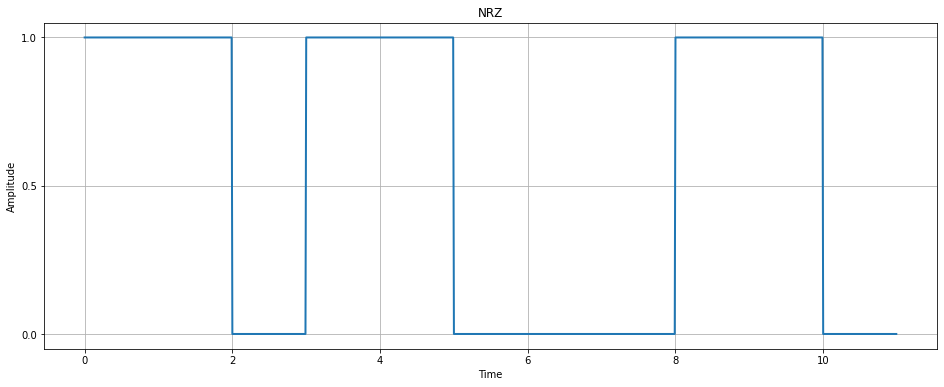

In [13]:
# Write a program to simulate the digital-digital conversion techniques NRZ, NRZ-L, Manchester 
# and Differential Manchester.



import numpy as np
import matplotlib.pyplot as plt

#NRZ

def NRZ(d):
    x=np.arange(0, len(d), 0.01)
    y=np.empty(0)
    for bit in d:
        if bit=='0':
            y=np.concatenate((y, np.zeros(100)))
        elif bit=='1':
            y=np.concatenate((y,np.ones(100)))
    plt.figure(figsize=(16, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('NRZ')
    plt.yticks([0,0.5,1])
    plt.grid('on')
    plt.show()

d = "11011000110"
NRZ(d)

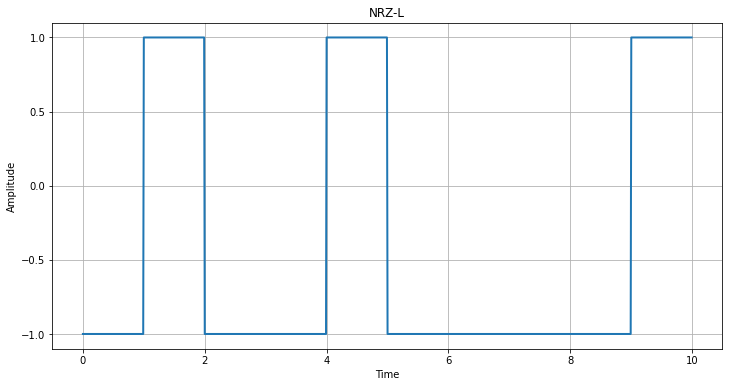

In [14]:
#NRZ-L

def NRZL(d):
    x=np.arange(0, len(d), 0.01)
    y=np.empty(0)
    for bit in d:
        if bit=='0':
            y=np.concatenate((y, np.ones(100)*(1)))
        elif bit=='1':
            y=np.concatenate((y,np.ones(100)*(-1)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('NRZ-L')
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.show()


d = "1011011110"
NRZL(d)

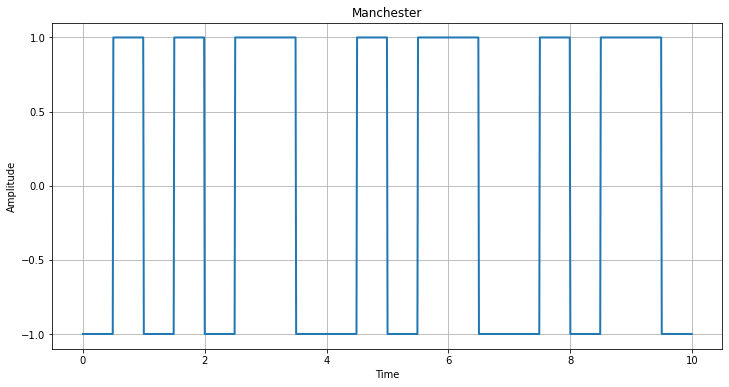

In [19]:
#Manchester

def Manchester(d):
    x=np.arange(0, len(d), 0.01)
    y=np.empty(0)
    for bit in d:
        if bit=='0':
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
        elif bit=='1':
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Manchester')
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.show()

d = "1110110110"
Manchester(d)

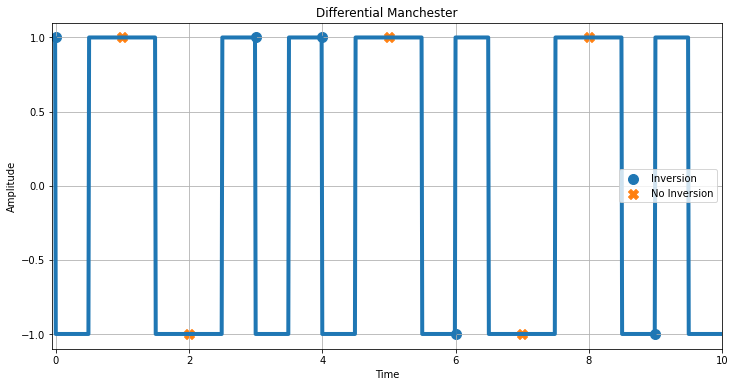

In [18]:
#Differential Manchester

def DifferentialManchester(d):
    x=np.arange(-1, len(d), 0.01)
    y=np.empty(0)
    inversion_x=[]
    inversion_y=[]
    no_inversion_x=[]
    no_inversion_y=[]
    y=np.concatenate((y, np.ones(50)*(-1)))
    y=np.concatenate((y, np.ones(50)*(1)))
    prev_state = 1
    i = -1
    for bit in d:
        i+=1
        if bit=='0' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            inversion_x.append(i)
            inversion_y.append(-1)
        elif bit=='0' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            inversion_x.append(i)
            inversion_y.append(1)
        elif bit=='1' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            prev_state=1
            no_inversion_x.append(i)
            no_inversion_y.append(-1)
        elif bit=='1' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            no_inversion_x.append(i)
            no_inversion_y.append(1)
            prev_state=-1
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=4)
    p1=plt.scatter(inversion_x, inversion_y, marker="o", s=10**2)
    p2=plt.scatter(no_inversion_x, no_inversion_y, marker="X", s=10**2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Differential Manchester')
    plt.xlim([-.05,len(d)])
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.legend([p1,p2],["Inversion","No Inversion"])
    plt.show()

d = "0110010110"
DifferentialManchester(d)